# Time Series Decomposition

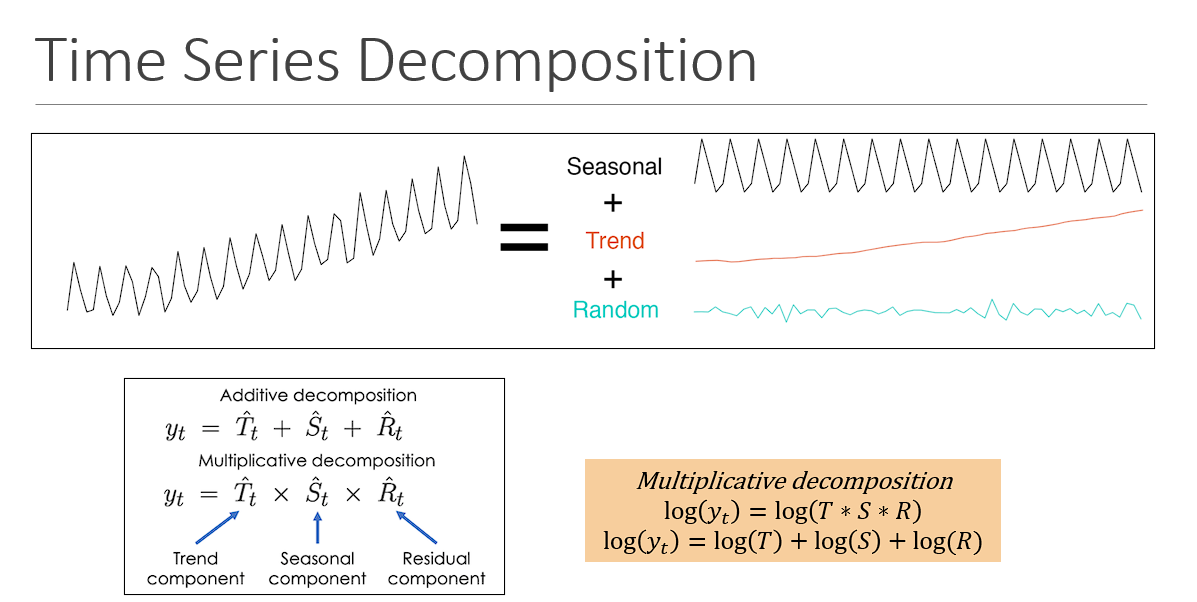

In [1]:
%pip install pmdarima


  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
  Using cached Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl (614 kB)
Using cached Cython-3.0.8-cp311-cp311-win_amd64.whl (2.8 MB)
   ---------------------------------------- 0.0/120.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/120.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/120.9 kB ? eta -:--:--
   ------------------- ------------------- 61.4/120.9 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 120.9/120.9 kB 1.0 MB/s eta 0:00:00


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataframe

In [8]:
import pandas as pd 
df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [11]:
df.isna().sum()

#Passengers    0
dtype: int64

### Change the column name

In [12]:
df.columns = ['nPass']

In [13]:
df.head()

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Visualizing the data

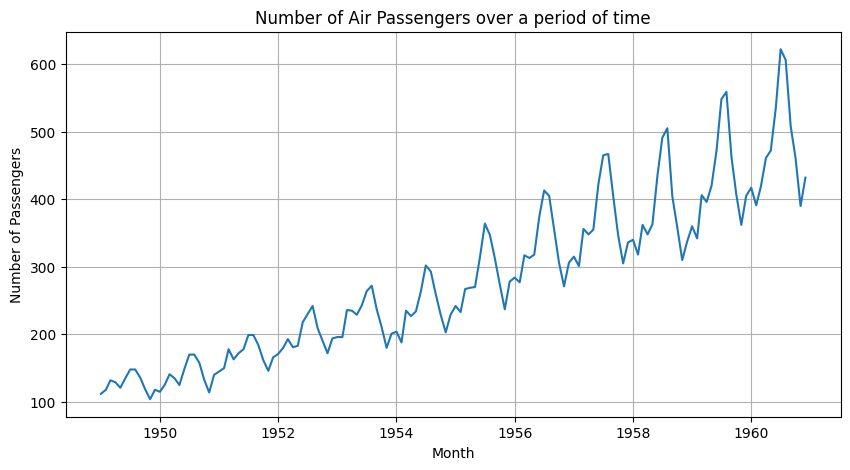

In [16]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.plot(df['nPass'])
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers over a period of time')
plt.grid()
plt.show()

### Create a time series decomposition

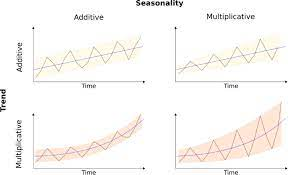

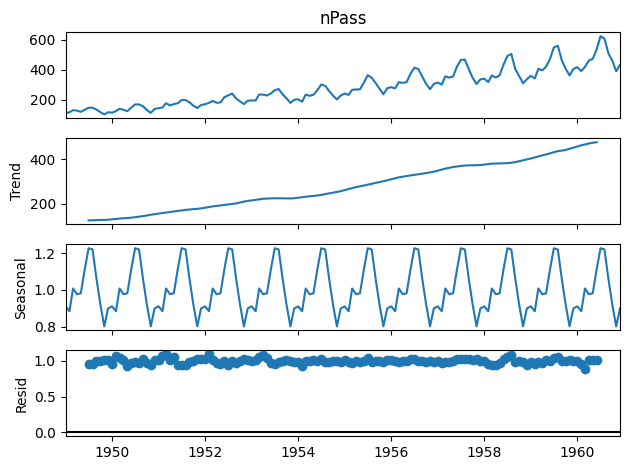

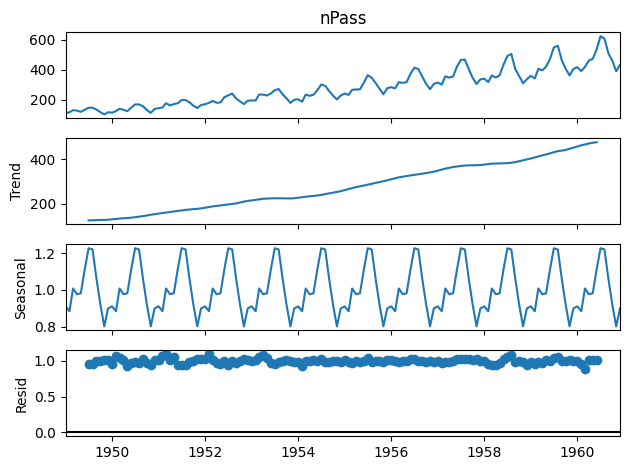

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['nPass'], model='multiplicative')
Q.plot()

In [18]:
Q.observed

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: nPass, Length: 144, dtype: float64

In [19]:
Q.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [20]:
Q.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [21]:
Q.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

### Plotting trend

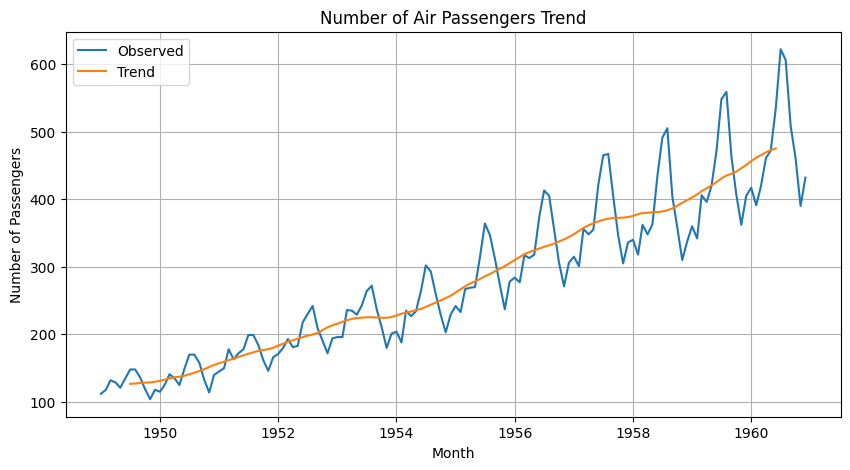

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df['nPass'], label='Observed')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers Trend')
plt.grid()
plt.legend()
plt.show()

### Seasonal plot

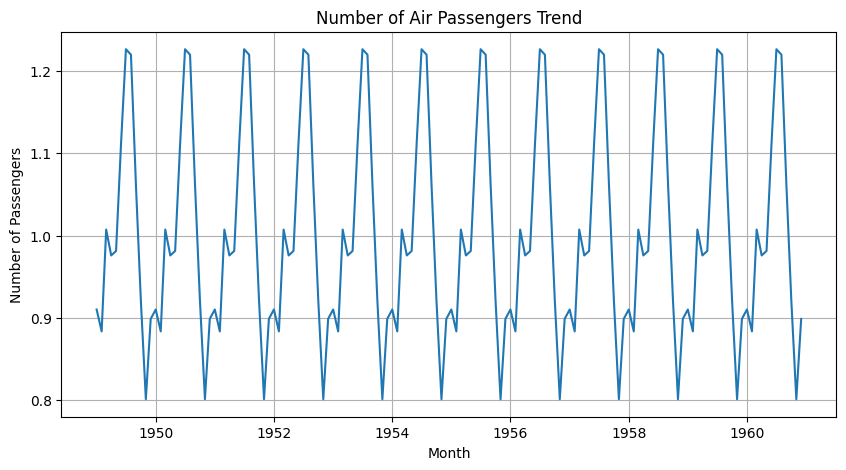

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(Q.seasonal)
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers Trend')
plt.grid()
plt.show()

### Plot the residuals

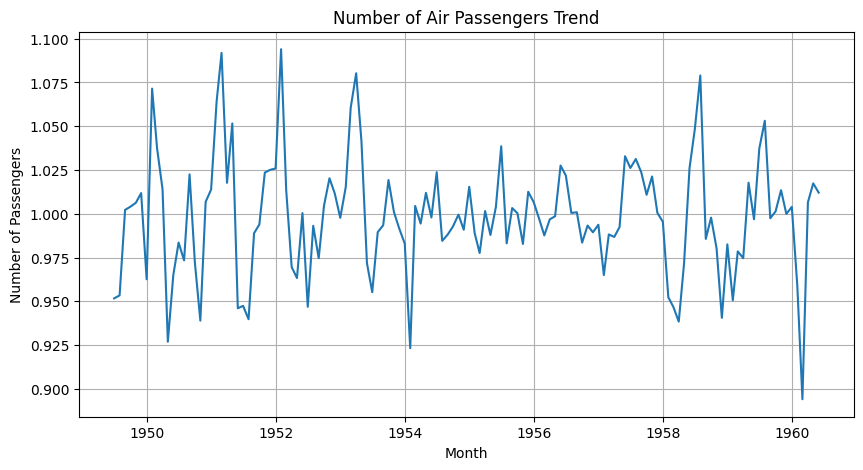

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(Q.resid)
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers Trend')
plt.grid()
plt.show()